## SC1015 Mini Project 
----------------------------------

### Part 1: Data Cleaning 

The first part of the project will start from preparing and cleanng the data for Analysis. This allows us to fit the data into our Machine Learning model of choice, which is chosen to answer our question.

#### Question : How can we effectively target Marketing advertisements to different Customer Groups? 

**Data Set** - UCL Online Retail Data Set from: https://archive.ics.uci.edu/ml/datasets/online+retail#

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
sb.set()

#### Importing the Data set

In [2]:
RetailData = pd.read_excel("Online Retail.xlsx")
RetailData

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Before we begin cleaning the data , we will understand what each column mean.

The following is extracted from the UCL Reporsitory that gives a description of each column: 

---

>`InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

>`StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

>`Description`: Product (item) name. Nominal.

>`Quantity`: The quantities of each product (item) per transaction. Numeric.

>`InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated.

>`UnitPrice`: Unit price. Numeric, Product price per unit in sterling.

>`CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

>`Country`: Country name. Nominal, the name of the country where each customer resides.

Reference : From https://archive.ics.uci.edu/ml/datasets/online+retail# (2015)

#### Now that we have imported the Data Set & Understood the it, we will clean the data.

In [3]:
RetailData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
RetailData['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [5]:
RetailData['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

<AxesSubplot:>

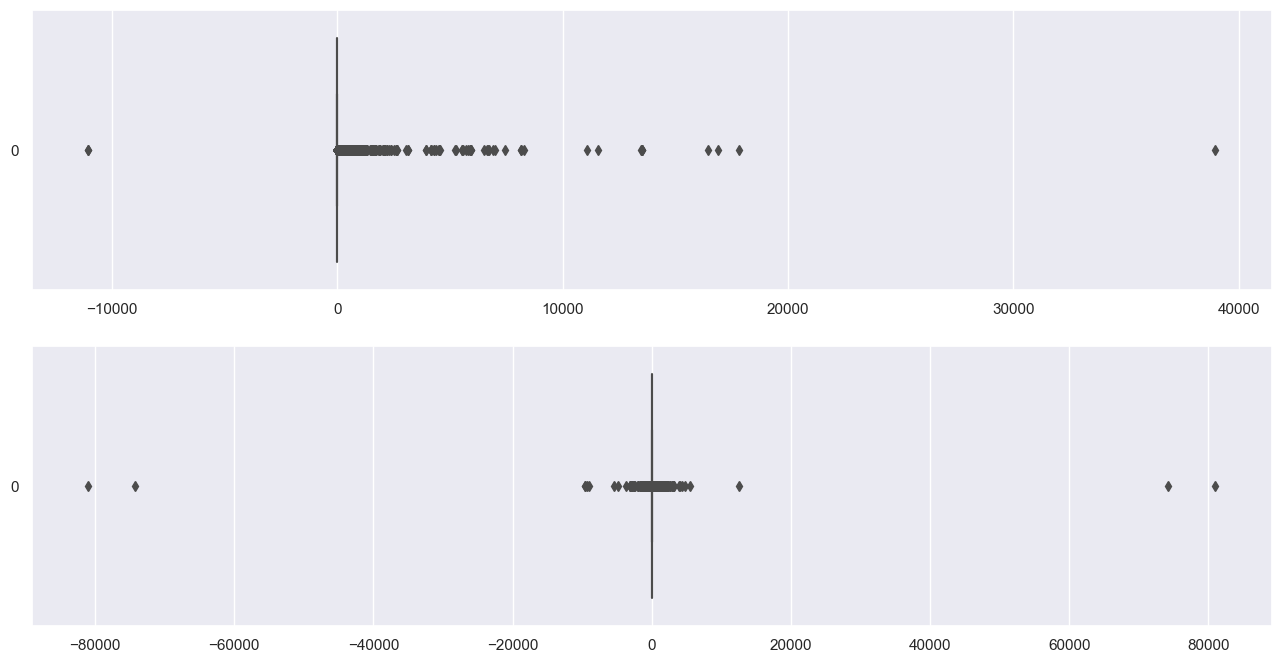

In [6]:
f, axes = plt.subplots(2, 1, figsize=(16, 8))

sb.boxplot(data = RetailData["UnitPrice"], orient = "h", ax = axes[0])
sb.boxplot(data = RetailData["Quantity"], orient = "h", ax = axes[1])

In [7]:
RetailData = RetailData[RetailData["Quantity"] > 0]
RetailData = RetailData[RetailData["UnitPrice"] > 0]

RetailData = RetailData[RetailData["Quantity"] < 25]
RetailData = RetailData[RetailData["UnitPrice"] < 25]
RetailData

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


<AxesSubplot:>

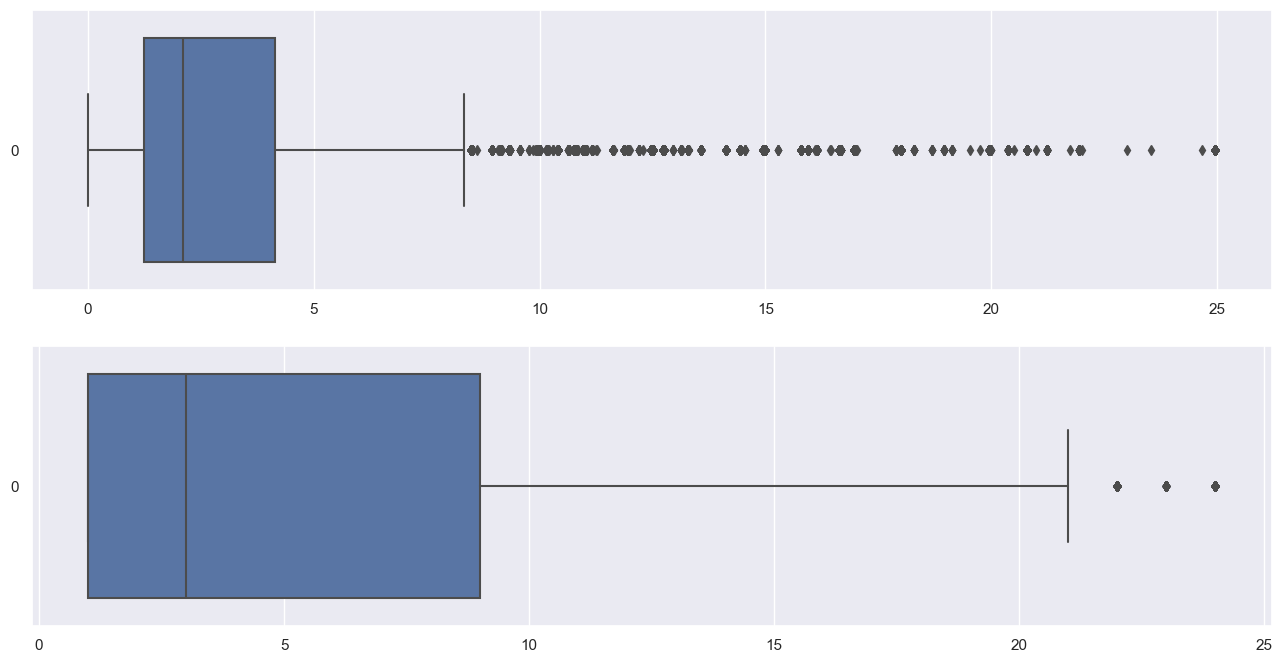

In [8]:
f, axes = plt.subplots(2, 1, figsize=(16, 8))

sb.boxplot(data = RetailData["UnitPrice"], orient = "h", ax = axes[0])
sb.boxplot(data = RetailData["Quantity"], orient = "h", ax = axes[1])

In [9]:
pd.DataFrame(round(RetailData.isnull().sum()),columns =['Null Values'])

,Null Values
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,129311
Country,0


In [10]:
RetailData = RetailData.dropna()
RetailData


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# Calculate Recency, Frequency, and Monetary values - Using RFM analysis 
snapshot_date = RetailData['InvoiceDate'].max() + pd.to_timedelta(1, unit='d')
RetailData['TotalAmount'] = RetailData['Quantity'] * RetailData['UnitPrice']

rfm_data = RetailData.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
})

# Rename the columns
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

# Reset index
rfm_data.reset_index(inplace=True)

# Scale the RFM values 
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])


C:\Users\jtann\AppData\Local\Temp\ipykernel_27676\4000258726.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RetailData['TotalAmount'] = RetailData['Quantity'] * RetailData['UnitPrice']


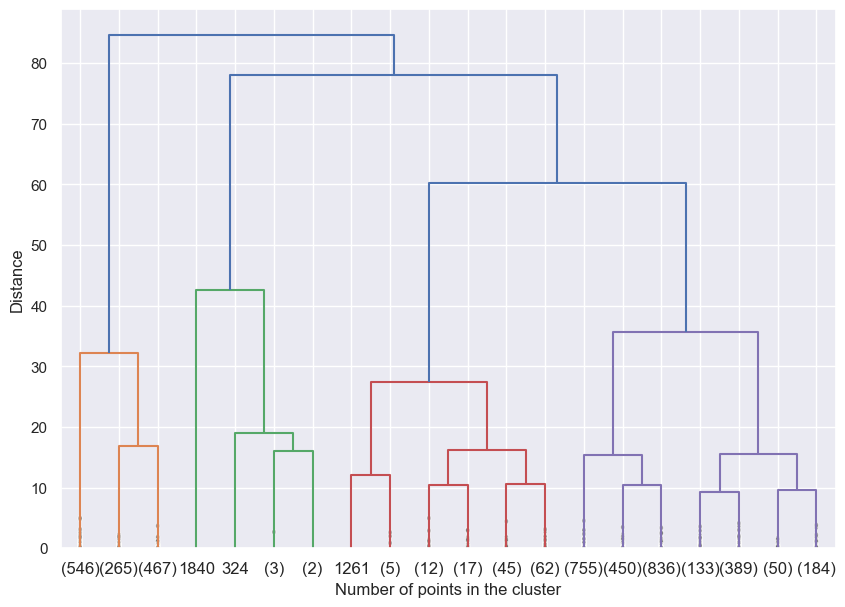

In [14]:
# Clustering - group data points into clusters based on their similarity
linked = linkage(rfm_scaled, method='ward')

# Plotting a dendrogram - 
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=20, show_contracted=True)
plt.xlabel("Number of points in the cluster")
plt.ylabel("Distance")
plt.show()

# Initially, each data point is considered a separate cluster.

#At each step of the algorithm, the two most similar clusters (i.e., with the smallest distance between them) are merged.

# The process continues iteratively until all data points belong to a single cluster.

In [15]:
n_clusters = 3
model = AgglomerativeClustering(n_clusters=n_clusters)
rfm_data['Cluster'] = model.fit_predict(rfm_scaled)

In [16]:
cluster_summary = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

In [17]:
print(cluster_summary)

        Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          35.2       4.8   1482.8  2939
1         225.1       1.6    409.9  1278
2           1.9     124.1  35322.9     7


The output will display the average recency, frequency, and monetary values for each cluster. Analyze these values to understand the characteristics of each segment:

Cluster 0: Low recency, high frequency, and high monetary value.

Cluster 1: High recency, low frequency, and low monetary value.

Cluster 2: Moderate recency, moderate frequency, and moderate monetary value.
Develop targeted marketing and product recommendation strategies:
For each cluster, devise strategies based on their characteristics:

